<a href="https://colab.research.google.com/github/siddardhPol3000/ML_python_projects/blob/main/Cats_vs_Dogs_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:08<00:00, 256MB/s]
100% 1.06G/1.06G [00:08<00:00, 138MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create convolutional neural network model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
 history= model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 89ms/step - loss: 0.6489 - accuracy: 0.6263 - val_loss: 0.5543 - val_accuracy: 0.7152
Epoch 2/10
625/625 [==============================] - 70s 112ms/step - loss: 0.5120 - accuracy: 0.7466 - val_loss: 0.5481 - val_accuracy: 0.7384
Epoch 3/10
625/625 [==============================] - 84s 134ms/step - loss: 0.4007 - accuracy: 0.8144 - val_loss: 0.5451 - val_accuracy: 0.7644
Epoch 4/10
625/625 [==============================] - 69s 111ms/step - loss: 0.2556 - accuracy: 0.8935 - val_loss: 0.6940 - val_accuracy: 0.7668
Epoch 5/10
625/625 [==============================] - 62s 99ms/step - loss: 0.1405 - accuracy: 0.9439 - val_loss: 0.9171 - val_accuracy: 0.7572
Epoch 6/10
625/625 [==============================] - 61s 97ms/step - loss: 0.0778 - accuracy: 0.9733 - val_loss: 1.2090 - val_accuracy: 0.7538
Epoch 7/10
625/625 [==============================] - 59s 94ms/step - loss: 0.0531 - accuracy: 0.9815 - val_loss: 1.2816 - val_accura

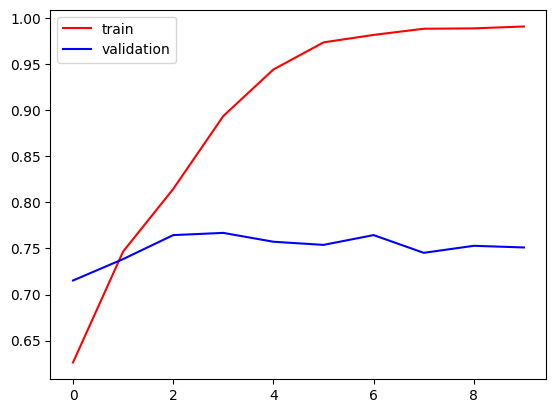

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

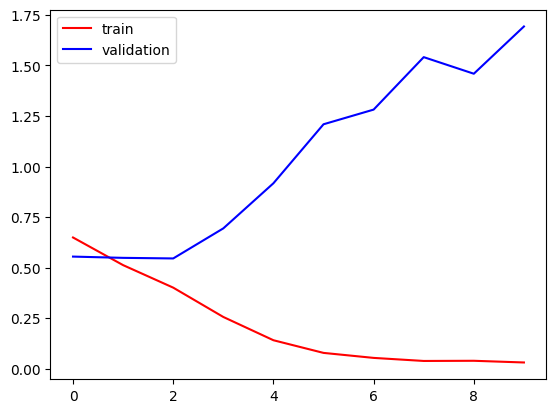

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Here are several techniques you can employ to mitigate overfitting in your CNN model
# More Data
# Data Augmentation
# Dropout
# Batch Normalization
# Regularization (L1, L2)
# Reduce Model Complexity
# Early Stopping
# Cross-Validation
# Ensemble Methods
# Weight Decay
# Learning Rate Scheduling
# Use Pretrained Models
# Feature Selection/Extraction
# Regularize Fully Connected Layers
# Validation Split